IMPLEMENTATION/DATA ANALYSIS

Navigating Tomorrow: The Interconnected Realms of AI Evolution, Politics, and Societal Liberty


This analyasis intends to explore the dynamic between global freedom political regimes, and the profound implications of artificial intelligence (AI) development on future societies. The central inquiry revolves around whether the deployment of AI by democratic governments is more inclined towards enhancing the well-being of their citizens. Can we determine the intent by looking at the political regime of a country? Through an examination of the pace of AI advancements across various political landscapes, this study aims to discern the underlying intentions by scrutinizing the evolving trends in freedom and economic indicators over time.  By closely analysing these factors, we seek to shed light on the potential impact AI might have on society in different political regimes. 


To kickstart our in-depth analysis, we'll incorporate a range of libraries crucial for the entire analytical process. Furthermore, we will integrate diverse visualization tools to illustrate and interpret the data in a manner best suited for our objectives.

In [66]:
import pandas as pd    #library for working with data frames, data manipulation and analysis
import numpy as np    #mathematical operations library
import matplotlib.pyplot as plt  #visualisation library
import seaborn as sns    # visualisation libray 
import plotly.express as px      #visualisation library
from sklearn.linear_model import LinearRegression #Linear regresion library

Next, we will import our initial CSV file, ensuring that it is presented as a table directly without the need for the 'print' statement before referencing the DataFrame name.

This file provides detailed information on 62 countries and their investments in research and development of AI. Additionally, it includes information on the political regimes of each country, which is of particular interest for our analysis.

In [67]:
ai_df = pd.read_csv ("C:/Users/marin/OneDrive/Radna površina/CA2 Data Analytics and Visualisation, Marina Pavlovic L00179789/AI_index_db.csv")
# Assign the name 'ai_df' to the DataFrame that will store our data. 
# We use 'pd' as an reference for the pandas library to indicate that we'll be using it to read a CSV file.
# The file path to our CSV is then provided.
ai_df.head() 
# We are displaying our data in a tabular format, which is why we are not using word print, and we are using the 'head' function to show only the first 5 rows.



,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy


Since the given data frame is structured well, we can start by eliminating unnecessary columns for a more comprehensive analysis. In this case we will only be using country total score and political regime.

In [68]:
ai_df = ai_df.loc[:, ['Country', 'Total score', 'Political regime']].copy() 
# Using .loc is helping us acces specific columns, while : refers to using all rows
# Selecting specific columns ('Country', 'Total score', 'Political regime').
# Using the 'copy()' method to create a new DataFrame.
ai_df
# Here, we use the DataFrame name 'ai_df' to display an overview of the data in tabular form.

,Country,Total score,Political regime
0,United States of America,100.00,Liberal democracy
1,China,62.92,Closed autocracy
2,United Kingdom,40.93,Liberal democracy
3,Canada,40.19,Liberal democracy
4,Israel,39.89,Liberal democracy
...,...,...,...
57,Sri Lanka,6.62,Electoral democracy
58,Egypt,4.83,Electoral autocracy
59,Kenya,2.30,Electoral autocracy
60,Nigeria,1.38,Electoral autocracy


Once we have our desired columns, we can perform our first analysis by grouping the total score based on the political regime to which it belongs.

In [69]:
total_score_by_regime = ai_df.groupby('Political regime')['Total score'].sum() 
# Grouping the data in the 'ai_df' DataFrame by the 'Political regime' column,
# then calculate the sum of 'Total score' for each group.
total_score_by_regime = total_score_by_regime.sort_values(ascending=False)
# Sorting the df by 'Total score' column in descending order.
total_score_by_regime 
# print


Political regime
Liberal democracy      862.61
Electoral democracy    368.95
Closed autocracy       156.63
Electoral autocracy     94.52
Name: Total score, dtype: float64

'What political regime is most prominent in AI development?' 

Addressing our initial question: The results clearly indicate that AI development is most prominent in democratic countries.
This results align with expectations, given that the majority of the AI technologies we currently use have originated from Western countries.

To gain a deeper insight into the implications for the future, we will now turn our attention to the next dataset.

Importing the second CSV file as 'freedom_df'.

This dataset provides comprehensive information on freedom changes from 2013 to 2022 for 211 countries worldwide. Freedom is categorized in various ways, with the most crucial classification for our analysis being the 'status,' offering three categories: free, partially free, and not free. The 'Total' column offers an in-depth look at the ways this status was obtained, including different measurements of freedom such as the electoral process, social liberties, etc.

In [70]:
freedom_df = pd.read_csv("C:/Users/marin/OneDrive/Radna površina/CA2 Data Analytics and Visualisation, Marina Pavlovic L00179789/Freedom ranking per country 2013-2022 Dataset (Ver 2.18.23).csv")
freedom_df
# Repeating the same we did with ai_df.

,Country/Territory,Region,C/T,Edition,Status,PR rating,CL rating,A1,A2,A3,...,F3,F4,F,G1,G2,G3,G4,G,CL,Total
0,Abkhazia,Eurasia,t,2022,PF,5,5,2,2,1,...,1,1,4,1,1,2,1,5,23,40
1,Afghanistan,Asia,c,2022,NF,7,6,0,0,0,...,0,0,0,0,1,0,1,2,9,10
2,Albania,Europe,c,2022,PF,3,3,3,3,3,...,2,3,9,3,2,2,2,9,39,67
3,Algeria,Africa,c,2022,NF,6,5,1,1,1,...,2,2,6,2,2,2,1,7,22,32
4,Andorra,Europe,c,2022,F,1,1,4,4,4,...,4,3,15,4,4,3,4,15,55,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,West Bank,Middle East,t,2013,NF,6,5,0,0,2,...,0,1,5,1,1,2,1,5,24,30
2091,Western Sahara,Africa,t,2013,NF,7,7,0,0,0,...,0,0,0,1,1,2,0,4,7,5
2092,Yemen,Middle East,c,2013,NF,6,6,1,0,2,...,0,1,2,2,1,1,1,5,16,25
2093,Zambia,Africa,c,2013,PF,3,4,3,3,3,...,2,2,8,3,2,1,2,8,34,62


At this point, it is evident that this dataset requires some cleaning. Therefore, we will commence by renaming a column, 'Country/Territory,' to 'Country' for easier utilization in subsequent code during our analysis."

In [71]:
freedom_df.rename(columns={'Country/Territory': 'Country'}, inplace=True)
# Rename the first column of the DataFrame to get rid of 'Teritory' and leave 'Country'.
# Using inplace=True to modify the original DataFrame.
freedom_df

,Country,Region,C/T,Edition,Status,PR rating,CL rating,A1,A2,A3,...,F3,F4,F,G1,G2,G3,G4,G,CL,Total
0,Abkhazia,Eurasia,t,2022,PF,5,5,2,2,1,...,1,1,4,1,1,2,1,5,23,40
1,Afghanistan,Asia,c,2022,NF,7,6,0,0,0,...,0,0,0,0,1,0,1,2,9,10
2,Albania,Europe,c,2022,PF,3,3,3,3,3,...,2,3,9,3,2,2,2,9,39,67
3,Algeria,Africa,c,2022,NF,6,5,1,1,1,...,2,2,6,2,2,2,1,7,22,32
4,Andorra,Europe,c,2022,F,1,1,4,4,4,...,4,3,15,4,4,3,4,15,55,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,West Bank,Middle East,t,2013,NF,6,5,0,0,2,...,0,1,5,1,1,2,1,5,24,30
2091,Western Sahara,Africa,t,2013,NF,7,7,0,0,0,...,0,0,0,1,1,2,0,4,7,5
2092,Yemen,Middle East,c,2013,NF,6,6,1,0,2,...,0,1,2,2,1,1,1,5,16,25
2093,Zambia,Africa,c,2013,PF,3,4,3,3,3,...,2,2,8,3,2,1,2,8,34,62


Once we have all the countries' names in the correct format, we will begin the process of selecting only those that appear in the first DataFrame. This is crucial, as our analysis will be performed exclusively on these countries. 
Subsequently, we will use the .copy method to create a duplicate of the dataset containing only the desired countries. This ensures the preservation of the integrity of the original dataset, allowing us to backtrack a few steps in case of any issues during our analysis, without major repercussions.

In [72]:
countries_to_keep = ['United States of America', 'China', 'United Kingdom', 'Canada', 'Israel', 'Singapore', 'South Korea', 'The Netherlands',
                     'Germany', 'France', 'Australia', 'Ireland', 'Finland', 'Denmark', 'Luxembourg', 'Japan', 'India', 'Switzerland', 'Sweden',
                     'Hong Kong', 'Spain', 'Austria', 'Estonia', 'Taiwan', 'Norway', 'Saudi Arabia', 'Belgium', 'Poland', 'Slovenia', 'New Zealand',
                     'Italy', 'Russia', 'Malta', 'United Arab Emirates', 'Portugal', 'Czech Republic', 'Iceland', 'Lithuania', 'Brazil', 'Greece',
                     'Slovakia', 'Hungary', 'Malaysia', 'Mexico', 'Chile', 'Argentina', 'Qatar', 'Turkey', 'Colombia', 'Uruguay', 'Bahrain', 'Vietnam',
                     'Indonesia', 'Tunisia', 'South Africa', 'Morocco', 'Armenia', 'Sri Lanka', 'Egypt', 'Kenya', 'Nigeria', 'Pakistan']
# Listing the countries we will keep fromoriginal freedom_df.
freedom_df = freedom_df[freedom_df['Country'].isin(countries_to_keep)].copy()
# Filtering Country column for teh list of countries from countries_to_keep using .isin 
freedom_df

,Country,Region,C/T,Edition,Status,PR rating,CL rating,A1,A2,A3,...,F3,F4,F,G1,G2,G3,G4,G,CL,Total
7,Argentina,Americas,c,2022,F,2,2,4,4,3,...,2,3,10,3,3,4,3,13,49,84
8,Armenia,Eurasia,c,2022,PF,4,4,2,2,3,...,2,2,6,2,3,2,2,9,32,55
9,Australia,Asia,c,2022,F,1,1,4,4,4,...,4,3,15,3,4,4,3,14,56,95
10,Austria,Europe,c,2022,F,1,1,4,4,4,...,4,3,15,4,4,4,3,15,56,93
13,Bahrain,Middle East,c,2022,NF,7,6,0,1,1,...,0,0,1,1,2,2,1,6,10,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,United Arab Emirates,Middle East,c,2013,NF,6,6,0,1,0,...,1,1,4,1,1,1,1,4,14,22
2083,United Kingdom,Europe,c,2013,F,1,1,4,4,4,...,4,3,15,4,4,4,3,15,57,97
2084,United States of America,Americas,c,2013,F,1,1,4,4,3,...,3,3,14,4,4,4,3,15,56,93
2085,Uruguay,Americas,c,2013,F,1,1,4,4,4,...,4,4,15,4,4,4,3,15,58,97


Given the size of our dataset, obtaining a comprehensive overview of the information is challenging. To address this, we will use code to list the countries included in our new dataset, providing a clear view of the selected entries.

In [73]:
print(freedom_df['Country'].unique()) 
# Printing the names of all countries in the 'Country' column while using.unique to avoid repetition.

['Argentina' 'Armenia' 'Australia' 'Austria' 'Bahrain' 'Belgium' 'Brazil'
 'Canada' 'Chile' 'China' 'Colombia' 'Czech Republic' 'Denmark' 'Egypt'
 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hong Kong' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Ireland' 'Israel' 'Italy' 'Japan' 'Kenya'
 'Lithuania' 'Luxembourg' 'Malaysia' 'Malta' 'Mexico' 'Morocco'
 'The Netherlands' 'New Zealand' 'Nigeria' 'Norway' 'Pakistan' 'Poland'
 'Portugal' 'Qatar' 'Russia' 'Saudi Arabia' 'Singapore' 'Slovakia'
 'Slovenia' 'South Africa' 'South Korea' 'Spain' 'Sri Lanka' 'Sweden'
 'Switzerland' 'Taiwan' 'Tunisia' 'Turkey' 'United Arab Emirates'
 'United Kingdom' 'United States of America' 'Uruguay' 'Vietnam']


In addition, we will employ code to check for any countries that might not have been included in our new dataset, investigating whether there are any instances where data wasn't passed through for some reason.

In [74]:
countries_to_keep = ['United States of America', 'China', 'United Kingdom', 'Canada', 'Israel', 'Singapore', 'South Korea', 'The Netherlands',
                     'Germany', 'France', 'Australia', 'Ireland', 'Finland', 'Denmark', 'Luxembourg', 'Japan', 'India', 'Switzerland', 'Sweden',
                     'Hong Kong', 'Spain', 'Austria', 'Estonia', 'Taiwan', 'Norway', 'Saudi Arabia', 'Belgium', 'Poland', 'Slovenia', 'New Zealand',
                     'Italy', 'Russia', 'Malta', 'United Arab Emirates', 'Portugal', 'Czech Republic', 'Iceland', 'Lithuania', 'Brazil', 'Greece',
                     'Slovakia', 'Hungary', 'Malaysia', 'Mexico', 'Chile', 'Argentina', 'Qatar', 'Turkey', 'Colombia', 'Uruguay', 'Bahrain', 'Vietnam',
                     'Indonesia', 'Tunisia', 'South Africa', 'Morocco', 'Armenia', 'Sri Lanka', 'Egypt', 'Kenya', 'Nigeria', 'Pakistan']
# Repeating the proces of selecting the countries we are filtering for.country for country in countries_to_keep if country not in freedom_df
missing_countries = [country for country in countries_to_keep if country not in freedom_df['Country'].unique()]
# This line of code uses a combination of a for loop and an if statement to iterate through the countries and identify the ones that are missing.
if missing_countries:
    print("Countries not present in the DataFrame:", missing_countries)
# Setting the condition if there are missing countries to list them,
else:
    print("All countries are present in the DataFrame.")
# if there are no missing countries this statement is going to be displayed.


All countries are present in the DataFrame.


At this stage, it was identified that some countries were not recognise and did requiring subsequent renaming. The names of these countries needed cleaning as they did not match those in the previous dataset. The cleaning process was done using Excel. 
This decision to optimize the analysis by correcting the names in Excel was made, as the analysis document had already become lengthy, reduction in the volume of information seemd like a proper choice.

After rectifying the names of the missing countries in Excel, we are able to have a complete dataset. 

We are currently selecting only the necessary columns to condense and remove uneeded information. Again, by utilizing the .copy method, we ensure that we are working with a duplicate of the information, preserving the integrity of the original dataset.

In [75]:
freedom_df = freedom_df[['Country', 'Edition', 'Status', 'Total']].copy()
# Separating specific columns in a copy of the DataFrame freedom_df for further processing.
freedom_df

,Country,Edition,Status,Total
7,Argentina,2022,F,84
8,Armenia,2022,PF,55
9,Australia,2022,F,95
10,Austria,2022,F,93
13,Bahrain,2022,NF,12
...,...,...,...,...
2082,United Arab Emirates,2013,NF,22
2083,United Kingdom,2013,F,97
2084,United States of America,2013,F,93
2085,Uruguay,2013,F,97


Next, we will examine the dataset for the presence of NaN and null values.

In [76]:
null_values = freedom_df.isnull()
# Checking for null values.
nan_values = freedom_df.isna()
# Check for NaN values.
print("Null Values:")
print(null_values)
# Printing the header and the boolean values (True or False) to check for correctness of information and grammar.
print("\nNaN Values:")
print(nan_values)
# Printing the header and the boolean values (True or False) to check for correctness of information and grammar.

Null Values:
      Country  Edition  Status  Total
7       False    False   False  False
8       False    False   False  False
9       False    False   False  False
10      False    False   False  False
13      False    False   False  False
...       ...      ...     ...    ...
2082    False    False   False  False
2083    False    False   False  False
2084    False    False   False  False
2085    False    False   False  False
2089    False    False   False  False

[620 rows x 4 columns]

NaN Values:
      Country  Edition  Status  Total
7       False    False   False  False
8       False    False   False  False
9       False    False   False  False
10      False    False   False  False
13      False    False   False  False
...       ...      ...     ...    ...
2082    False    False   False  False
2083    False    False   False  False
2084    False    False   False  False
2085    False    False   False  False
2089    False    False   False  False

[620 rows x 4 columns]


As there seem to be none, we can proceed with the analysis.

“How did the freedom status change in the observed countries over the past 10 years?”

To answer our next question, we will organize the necessary information and create a pivot table. For the purpose of clarity, we will examine the results from this collective perspective, rather than focusing on each country individually. This will provide us with a different perspective on the data, as we group each status for each year. By doing so, we aim to gain deeper insights into the changes in freedom status over the years.

In [77]:
grouped_df = freedom_df.groupby(['Edition', 'Status']).size().reset_index(name='Count')
# Grouping by 'Edition' and 'Status' columns.
# Counting the occurrences of each status in a year.
# Resetting the index and renaming the resulting count column to 'Count'.

pivot_df = grouped_df.pivot_table(index='Edition', columns='Status', values='Count')
# Creating a pivot table with 'Edition' as the index, 'Status' as columns, and 'Count' as the values.

pivot_df 

Status,F,NF,PF
Edition,,,
2013,41.0,7.0,14.0
2014,40.0,8.0,14.0
2015,41.0,8.0,13.0
2016,41.0,8.0,13.0
2017,41.0,8.0,13.0
2018,41.0,9.0,12.0
2019,40.0,9.0,13.0
2020,40.0,9.0,13.0
2021,39.0,9.0,14.0


Subsequently, we will visualize the results to enhance understanding.

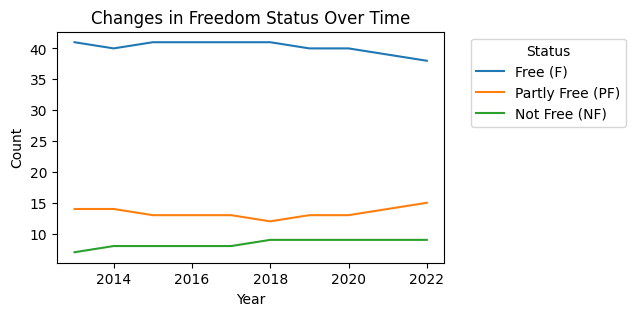

In [78]:
# Using matplotlib library to visualise data.

plt.figure(figsize=(5, 3))  
# Creating the plot and seting its size that can be adjusted as neede.

plt.plot(pivot_df.index, pivot_df['F'], label='Free (F)')
# Creating a plot line for the Free status ('F') with its index value. 

plt.plot(pivot_df.index, pivot_df['PF'], label='Partly Free (PF)')
# Creating a plot line for the Free status ('PF') with its index value. 

plt.plot(pivot_df.index, pivot_df['NF'], label='Not Free (NF)')
# Creating a plot line for the Free status ('NF') with its index value. 

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Changes in Freedom Status Over Time')
# Adding labels for each axes and title for the plot.

plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left') 
# Adding legend 

plt.show()
# Displaying the plot

Visualizing the information in this manner allows us to clearly observe the most significant changes occurring in the status of free countries. Specifically, there has been a decrease in the number of free countries, accompanied by a simultaneous increase in the number of partially free countries. Given that a significant portion of AI development has historically occurred in democratic, free countries, observing negative changes within this particular group raises questions about potential implications for the future. Further investigation is wneeded to understand the consequences of these developments.

“What tendencies are emerging for the future?”

As the results of predicting future trends didn't offer any significant insights, a decision was made to try a different approach. Instead, we will now focus on exploring other information within our dataset.

To reinforce the previous results, we will examine the 'Total' column, which encompasses various aspects of individual freedom such as social liberties, political rights, and the electoral process. Through this analysis, our objective is to ascertain the percentage of countries that have undergone a negative change in their freedom status.


In [79]:
freedom_df['Freedom_Dropped'] = freedom_df.groupby('Country')['Total'].diff().lt(0).astype(int)
# Create a new column 'Freedom_Dropped' by grouping the data by country and calculating the difference in Total.
# .lt(0) compares each value with 0 and returns a boolean value, True or False.
# .astype(int) converts the result to an integer, creating 0 for False and 1 for True.

countries_freedom_dropped = freedom_df.loc[freedom_df['Freedom_Dropped'] == 1, 'Country'].unique()
# Filtering the DataFrame by equating 'Freedom_Dropped' with the boolean value 1,
# which will select only the countries that have experienced a drop in the total.

print('Countries where freedom has dropped:')
print(countries_freedom_dropped)


Countries where freedom has dropped:
['Chile' 'Armenia' 'Bahrain' 'Italy' 'New Zealand' 'Slovakia' 'Slovenia'
 'Taiwan' 'Tunisia' 'Argentina' 'Greece' 'Turkey' 'United Kingdom'
 'Belgium' 'Colombia' 'Ireland' 'Malaysia' 'Mexico' 'Qatar' 'South Africa'
 'Sri Lanka' 'Singapore' 'South Korea' 'Nigeria' 'Pakistan' 'Australia'
 'Canada' 'Egypt' 'Iceland' 'Indonesia' 'Japan' 'Sweden' 'Czech Republic'
 'India' 'Lithuania' 'Uruguay' 'Vietnam']


We are going to further elaborate this result.

In [80]:
countries_of_interest = ['Chile', 'Armenia', 'Bahrain', 'Italy', 'New Zealand', 'Slovakia', 'Slovenia',
                          'Taiwan', 'Tunisia', 'Argentina', 'Greece', 'Turkey', 'United Kingdom',
                          'Belgium', 'Colombia', 'Ireland', 'Malaysia', 'Mexico', 'Qatar', 'South Africa',
                          'Sri Lanka', 'Singapore', 'South Korea', 'Nigeria', 'Pakistan', 'Australia',
                          'Canada', 'Egypt', 'Iceland', 'Indonesia', 'Japan', 'Sweden', 'Czech Republic',
                          'India', 'Lithuania', 'Uruguay', 'Vietnam']
# Listining the countries that we will use for this calculation.

total_countries_in_df = freedom_df['Country'].nunique()
# Count the total number of unique countries in the DataFrame.

common_countries = set(countries_of_interest) & set(freedom_df['Country'].unique())
# Find the set intersection between countries from our list and those in the DataFrame.

percentage_countries_of_interest = (len(common_countries) / total_countries_in_df) * 100
# Calculate the percentage by dividing the length of common_countries by total_countries_in_df and multiplying the result by 100.

print(f'Percentage of countries with changed freedom status: {percentage_countries_of_interest:.2f}%')
# Printing the statement with two digits after the decimal point and presenting it as a percentage.


Percentage of countries with changed freedom status: 59.68%


Then, we will group the countries that experienced a drop in their 'Total' by their status so we can take an even deeper look into our results.

In [82]:
dropped_countries_df = freedom_df[freedom_df['Freedom_Dropped'] == 1].drop_duplicates(subset='Country')
# Filter unique countries where freedom has dropped and dropping duplicate values in the 'Country' column

status_sum = dropped_countries_df.groupby('Status').size()
# Calculate the sum for each status

status_sum_sorted = status_sum.sort_values(ascending=False)
# Sort the result in descending order

print('Sum of unique countries per status where freedom has dropped (descending order):')
print(status_sum_sorted)


Sum of unique countries per status where freedom has dropped (descending order):
Status
F     23
PF     9
NF     5
dtype: int64


Out of the countries that have experienced a decline in freedom points, 23 are classified as 'free.' This conclusion offers valuable insights into the fragility of our freedom, highlighting significant variability in freedom levels worldwide. The data suggests that a considerable amount of instability originates from regions where we typically assume there is greater freedom, such as Western countries.

While it is challenging for countries with initially restricted freedom to improve their status, the ease with which 'free' or 'partially free' countries have lost their freedom in recent years is unexpected. The fact that almost 60 percent of the analyzed countries have seen a decrease in their level of freedom indicates substantial shifts occurring in tandem with the development of AI.

Now, we will proceed to merge our first two files for further elaboration.

In [84]:
merged_df = pd.merge(freedom_df, ai_df, on='Country', how='inner')
# Merging the data on two data frames on the coulumn Country by removing values that don't match. 
merged_df


,Country,Edition,Status,Total,Freedom_Dropped,Total score,Political regime
0,Argentina,2022,F,84,0,15.24,Electoral democracy
1,Argentina,2021,F,84,0,15.24,Electoral democracy
2,Argentina,2020,F,85,0,15.24,Electoral democracy
3,Argentina,2019,F,84,1,15.24,Electoral democracy
4,Argentina,2018,F,83,1,15.24,Electoral democracy
...,...,...,...,...,...,...,...
615,Vietnam,2017,NF,20,0,11.62,Closed autocracy
616,Vietnam,2016,NF,20,0,11.62,Closed autocracy
617,Vietnam,2015,NF,20,0,11.62,Closed autocracy
618,Vietnam,2014,NF,20,0,11.62,Closed autocracy


At this stage, we will rename our 'Year' column to make future merging easier.

In [85]:
merged_df.rename(columns={'Edition': 'Year'}, inplace=True)
# Renaming the column Year.
merged_df

,Country,Year,Status,Total,Freedom_Dropped,Total score,Political regime
0,Argentina,2022,F,84,0,15.24,Electoral democracy
1,Argentina,2021,F,84,0,15.24,Electoral democracy
2,Argentina,2020,F,85,0,15.24,Electoral democracy
3,Argentina,2019,F,84,1,15.24,Electoral democracy
4,Argentina,2018,F,83,1,15.24,Electoral democracy
...,...,...,...,...,...,...,...
615,Vietnam,2017,NF,20,0,11.62,Closed autocracy
616,Vietnam,2016,NF,20,0,11.62,Closed autocracy
617,Vietnam,2015,NF,20,0,11.62,Closed autocracy
618,Vietnam,2014,NF,20,0,11.62,Closed autocracy


We are creating a new dataframe that will contain information only for the year 2022. This will enable us to start answering our next question by performing a more specific analysis for this time period.

In [86]:
merged_df_2022 = merged_df[merged_df['Year'] == 2022].copy()
# Create a new DataFrame for the year 2022 without modifying the original DataFrame.

merged_df_2022

,Country,Year,Status,Total,Freedom_Dropped,Total score,Political regime
0,Argentina,2022,F,84,0,15.24,Electoral democracy
10,Armenia,2022,PF,55,0,8.49,Electoral democracy
20,Australia,2022,F,95,0,33.86,Liberal democracy
30,Austria,2022,F,93,0,26.89,Electoral democracy
40,Bahrain,2022,NF,12,0,11.79,Closed autocracy
...,...,...,...,...,...,...,...
570,United Arab Emirates,2022,NF,17,0,21.17,Closed autocracy
580,United Kingdom,2022,F,93,0,40.93,Liberal democracy
590,United States of America,2022,F,83,0,100.00,Liberal democracy
600,Uruguay,2022,F,97,0,13.27,Liberal democracy


Next, we are creating a top 20 list of countries that rank highest in AI development.

In [88]:
top_20_df = merged_df_2022.sort_values(by='Total score', ascending=False).head(20)
# Sort the DataFrame by 'Total score' in descending order and select the top 20

result_df = top_20_df[['Country', 'Total score', 'Status']].reset_index(drop=True)
# Reset the index and drop the old one

result_df.index += 1
# Add 1 to all index values

result_df



,Country,Total score,Status
1,United States of America,100.00,F
2,China,62.92,NF
3,United Kingdom,40.93,F
4,Canada,40.19,F
5,Israel,39.89,F
6,Singapore,38.67,PF
7,South Korea,38.60,F
8,The Netherlands,36.35,F
9,Germany,36.04,F
10,France,34.42,F


Now, we are comparing countries that experienced a drop in freedom with the top 20 AI developing countries to determine how many of them are included in the top 20 list.

In [90]:
target_countries = ['Argentina', 'Armenia', 'Australia', 'Austria', 'Bahrain',
       'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia',
       'Czech Republic', 'Denmark', 'Egypt', 'Estonia', 'France',
       'Germany', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Ireland', 'Israel', 'Italy', 'Kenya', 'Lithuania',
       'Luxembourg', 'Malaysia', 'Malta', 'Mexico', 'Morocco',
       'New Zealand', 'Nigeria', 'Pakistan', 'Poland', 'Portugal',
       'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'Slovakia',
       'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka',
       'Sweden', 'The Netherlands', 'Tunisia', 'Turkey',
       'United Arab Emirates', 'United Kingdom',
       'United States of America', 'Uruguay', 'Vietnam']

countries_in_top_20 = top_20_df[top_20_df['Country'].isin(target_countries)]
# Checking how many countries from the predefined list are in the top 20

result_df = countries_in_top_20[['Country', 'Total score', 'Status']].reset_index(drop=True)
# Reset the index and drop the old one

result_df.index += 1
# Add 1 to all index values to start from 1

result_df


,Country,Total score,Status
1,United States of America,100.00,F
2,China,62.92,NF
3,United Kingdom,40.93,F
4,Canada,40.19,F
5,Israel,39.89,F
6,Singapore,38.67,PF
7,South Korea,38.60,F
8,The Netherlands,36.35,F
9,Germany,36.04,F
10,France,34.42,F


Are there countries that are on the trajectory to lose freedom or are already not free that rank high in AI development?

Out of the top 20 AI-developing countries, 17 have experienced some form of freedom loss in the past 10 years. If we observe a historical trend of freedom loss over the past decade, it suggests a potential continuation of this trend

We will continue our analysis by importing our last dataset economy_df. 

This dataset comprises detailed information on the economic progress of 220 countries over a span of 50 years. For the purpose of this analysis, we will focus on a specific segment of the data, extracting insights from a single analysis within the 50-year period and subsequently condensing the dataset.

In [ ]:
economy_df = pd.read_csv("C:/Users/marin/OneDrive/Radna površina/CA2 Data Analytics and Visualisation, Marina Pavlovic L00179789/Global Economy Indicators.csv")
economy_df

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,1.952772e+08,3.701468e+08,3.766908e+08,1.277478e+08,1.731454e+09,8.391720e+07,2.263871e+08,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,2.762965e+08,3.875495e+08,3.944012e+08,1.337541e+08,1.812857e+09,8.786038e+07,2.370192e+08,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,2.903704e+08,3.522847e+08,3.585129e+08,1.215827e+08,1.647918e+09,7.986452e+07,2.154773e+08,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,2.629629e+08,3.640103e+08,3.704458e+08,1.256302e+08,1.702735e+09,8.252888e+07,2.226243e+08,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,3.056792e+08,4.407604e+08,4.485528e+08,1.521192e+08,2.061752e+09,9.991860e+07,2.695259e+08,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,894,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,894,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,894,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10


We will begin by creating a copy of this data set with only columns we need.

To ensure they are prepared for furtehr selection we will use code to inspect our column names.

In [ ]:
print(economy_df.columns)
# Displaying the column names as they are currently.

Index([' CountryID ', ' Country ', ' Year ', ' AMA exchange rate ',
       ' IMF based exchange rate ', ' Population ', ' Currency ',
       ' Per capita GNI ',
       ' Agriculture, hunting, forestry, fishing (ISIC A-B) ',
       ' Changes in inventories ', ' Construction (ISIC F) ',
       ' Exports of goods and services ', ' Final consumption expenditure ',
       ' General government final consumption expenditure ',
       ' Gross capital formation ',
       ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ',
       ' Household consumption expenditure (including Non-profit institutions serving households) ',
       ' Imports of goods and services ', ' Manufacturing (ISIC D) ',
       ' Mining, Manufacturing, Utilities (ISIC C-E) ',
       ' Other Activities (ISIC J-P) ', ' Total Value Added ',
       ' Transport, storage and communication (ISIC I) ',
       ' Wholesale, retail trade, restaurants and hotels (ISIC G-H) ',
       ' Gross National In

Column names have extra whitespace that could complicate our process of selecting columns for further use. For this reason, we will use the .strip() method to remove extra whitespace from column names and country names simultaneously.

In [ ]:
economy_df.columns = [col.strip() for col in economy_df.columns]
# Strip whitespaces from all column names using a for loop.

economy_df['Country'] = economy_df['Country'].str.strip()
# Striping whitespaces from country names 

economy_df

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,1.952772e+08,3.701468e+08,3.766908e+08,1.277478e+08,1.731454e+09,8.391720e+07,2.263871e+08,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,2.762965e+08,3.875495e+08,3.944012e+08,1.337541e+08,1.812857e+09,8.786038e+07,2.370192e+08,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,2.903704e+08,3.522847e+08,3.585129e+08,1.215827e+08,1.647918e+09,7.986452e+07,2.154773e+08,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,2.629629e+08,3.640103e+08,3.704458e+08,1.256302e+08,1.702735e+09,8.252888e+07,2.226243e+08,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,3.056792e+08,4.407604e+08,4.485528e+08,1.521192e+08,2.061752e+09,9.991860e+07,2.695259e+08,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,894,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,894,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,894,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10


Now we are ready to separate columns we need.

In [ ]:
economy_df = economy_df[['Country', 'Year', 'Per capita GNI']].copy()
economy_df

,Country,Year,Per capita GNI
0,Afghanistan,1970,164
1,Afghanistan,1971,168
2,Afghanistan,1972,149
3,Afghanistan,1973,150
4,Afghanistan,1974,177
...,...,...,...
10507,Zambia,2017,1448
10508,Zambia,2018,1451
10509,Zambia,2019,1246
10510,Zambia,2020,928


We will go through the same process as with freedom_df to ensure that we are working with the same countries from the start.

In [ ]:
countries_to_keep = ['United States of America', 'China', 'United Kingdom', 'Canada', 'Israel', 'Singapore', 'South Korea', 'The Netherlands',
                     'Germany', 'France', 'Australia', 'Ireland', 'Finland', 'Denmark', 'Luxembourg', 'Japan', 'India', 'Switzerland', 'Sweden',
                     'Hong Kong', 'Spain', 'Austria', 'Estonia', 'Taiwan', 'Norway', 'Saudi Arabia', 'Belgium', 'Poland', 'Slovenia', 'New Zealand',
                     'Italy', 'Russia', 'Malta', 'United Arab Emirates', 'Portugal', 'Czech Republic', 'Iceland', 'Lithuania', 'Brazil', 'Greece',
                     'Slovakia', 'Hungary', 'Malaysia', 'Mexico', 'Chile', 'Argentina', 'Qatar', 'Turkey', 'Colombia', 'Uruguay', 'Bahrain', 'Vietnam',
                     'Indonesia', 'Tunisia', 'South Africa', 'Morocco', 'Armenia', 'Sri Lanka', 'Egypt', 'Kenya', 'Nigeria', 'Pakistan']

# Keep only the rows with countries_to_keep
economy_df_countries = economy_df[economy_df['Country'].isin(countries_to_keep)].copy()

# Display the filtered DataFrame
economy_df



,Country,Year,Per capita GNI
0,Afghanistan,1970,164
1,Afghanistan,1971,168
2,Afghanistan,1972,149
3,Afghanistan,1973,150
4,Afghanistan,1974,177
...,...,...,...
10507,Zambia,2017,1448
10508,Zambia,2018,1451
10509,Zambia,2019,1246
10510,Zambia,2020,928


In [ ]:
countries_to_keep = ['United States of America', 'China', 'United Kingdom', 'Canada', 'Israel', 'Singapore', 'South Korea', 'The Netherlands',
                     'Germany', 'France', 'Australia', 'Ireland', 'Finland', 'Denmark', 'Luxembourg', 'Japan', 'India', 'Switzerland', 'Sweden',
                     'Hong Kong', 'Spain', 'Austria', 'Estonia', 'Taiwan', 'Norway', 'Saudi Arabia', 'Belgium', 'Poland', 'Slovenia', 'New Zealand',
                     'Italy', 'Russia', 'Malta', 'United Arab Emirates', 'Portugal', 'Czech Republic', 'Iceland', 'Lithuania', 'Brazil', 'Greece',
                     'Slovakia', 'Hungary', 'Malaysia', 'Mexico', 'Chile', 'Argentina', 'Qatar', 'Turkey', 'Colombia', 'Uruguay', 'Bahrain', 'Vietnam',
                     'Indonesia', 'Tunisia', 'South Africa', 'Morocco', 'Armenia', 'Sri Lanka', 'Egypt', 'Kenya', 'Nigeria', 'Pakistan']

missing_countries = [country for country in countries_to_keep if country not in economy_df['Country'].unique()]

if missing_countries:
    print("Countries not present in the DataFrame:", missing_countries)
else:
    print("All countries are present in the DataFrame.")


Countries not present in the DataFrame: ['Taiwan']


Taiwan was not in this dataset so it had to be exluded from futher analysis. 
Countries that needed renaming were renamed directly in exel file.

Straight after we will continue by checking for null and NaN values.

In [ ]:
null_values = economy_df.isnull()

nan_values = economy_df.isna()

print("Null Values:")
print(null_values)

print("\nNaN Values:")
print(nan_values)

Null Values:
       Country   Year  Per capita GNI
0        False  False           False
1        False  False           False
2        False  False           False
3        False  False           False
4        False  False           False
...        ...    ...             ...
10507    False  False           False
10508    False  False           False
10509    False  False           False
10510    False  False           False
10511    False  False           False

[10512 rows x 3 columns]

NaN Values:
       Country   Year  Per capita GNI
0        False  False           False
1        False  False           False
2        False  False           False
3        False  False           False
4        False  False           False
...        ...    ...             ...
10507    False  False           False
10508    False  False           False
10509    False  False           False
10510    False  False           False
10511    False  False           False

[10512 rows x 3 columns]


"How has the economic status changed within the past ten years for these countries?" 


To gain an even better perspective, we will be examining the economic changes over the last 50 years.


The visualization we are conducting may not be the most practical, but it provides a clear way to observe economic progress within the countries.

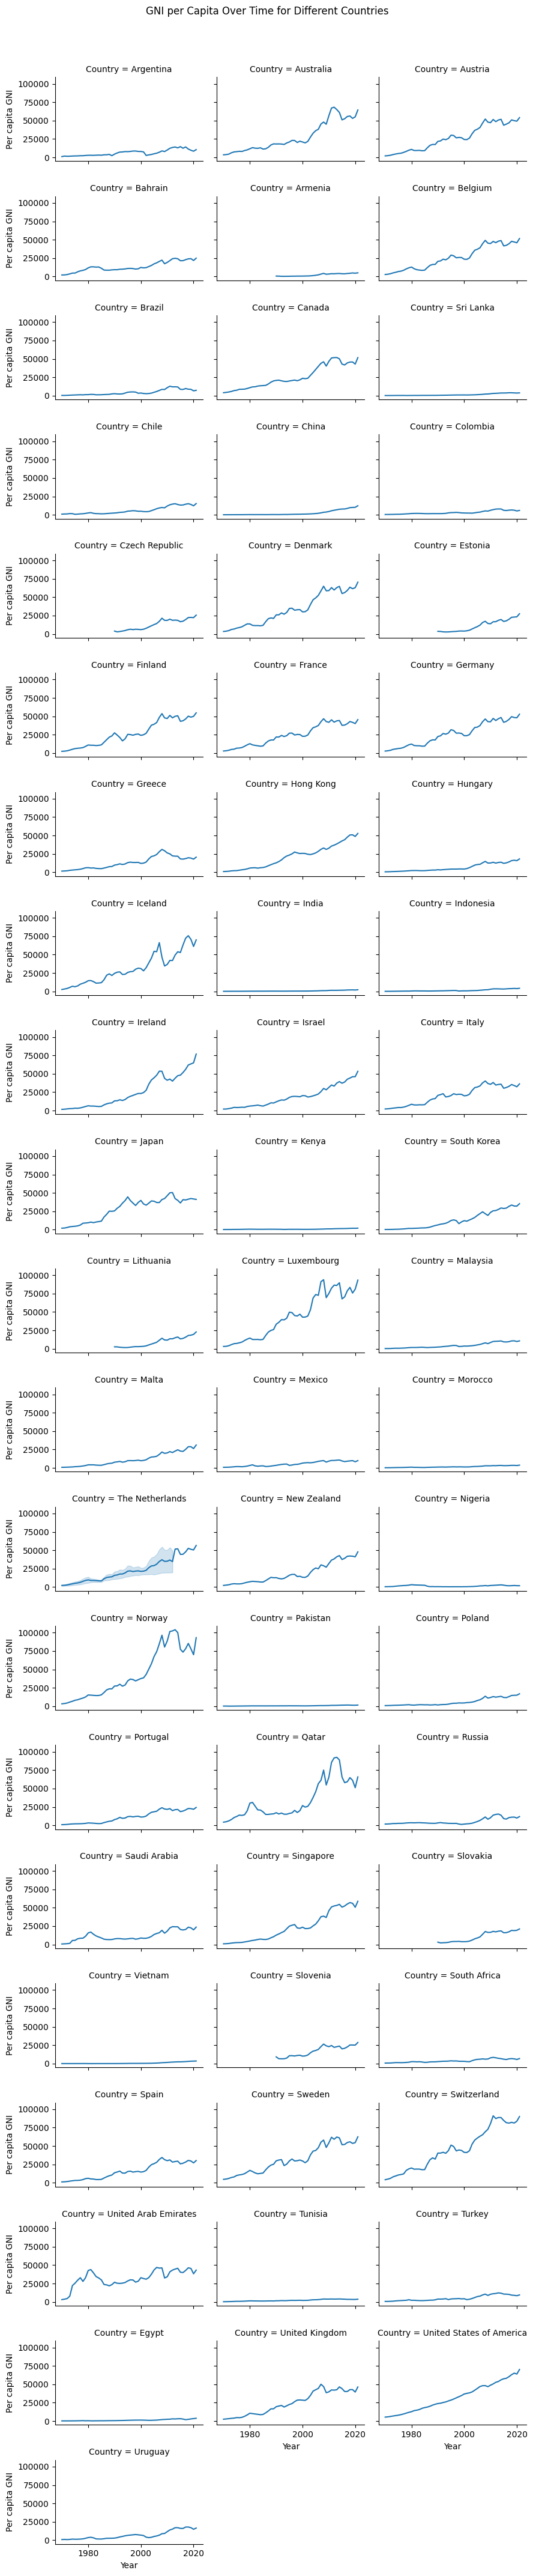

In [ ]:
# Visualising the data in this instance using seaborn for statistical calculation and matplotlib for visualisation

g = sns.FacetGrid(economy_df_countries, col='Country', col_wrap=3, height=2, aspect=1.5)
# Creating the grid of subplots following the column Country and adjusting its size.

g.map(sns.lineplot, 'Year', 'Per capita GNI')
# Asigning lineplots to two columns.

g.fig.suptitle('GNI per Capita Over Time for Different Countries', y=1.02)  
# Creating the title for the plot and adjusting its position.

plt.show()



This visualization offers us great insight into each country's economic development or lack thereof. For some countries, like the United States, there has been almost constant economic growth, while countries like Sweden faced a more challenging path to reach the point of economic stability they currently enjoy. 
Additionally, we can observe that information for some countries is not available for the entire time period due to their obtaining independence more recently in history.

As we observe notable differences in the economic status of our selected countries, we are now set to execute the final merge of our datasets. This consolidation will facilitate a deeper exploration of economic indicators in correlation with the rest of our analysis.

In [ ]:
final_df = pd.merge(merged_df, economy_df, on=['Country','Year'], how='inner')

final_df.head()



,Country,Year,Status,Total,Freedom_Dropped,Total score,Political regime,Per capita GNI
0,Argentina,2021,F,84,0,15.24,Electoral democracy,10590
1,Argentina,2020,F,85,0,15.24,Electoral democracy,8425
2,Argentina,2019,F,84,1,15.24,Electoral democracy,9722
3,Argentina,2018,F,83,1,15.24,Electoral democracy,11395
4,Argentina,2017,F,82,1,15.24,Electoral democracy,14237


We will perform an inner join based on the year, even though it entails losing information for 2022 on freedom changes due to the absence of per capita GNI data for that year. Including it would introduce more distortion into our analysis than omitting this year from freedom changes.

In [ ]:
final_df_filtered = final_df[(final_df['Year'] >= 2013) & (final_df['Year'] <= 2022)]
# Selecting only the years equal to or higher than 2013 and lower than or equal to 2022.

final_df_filtered

,Country,Year,Status,Total,Freedom_Dropped,Total score,Political regime,Per capita GNI
0,Argentina,2021,F,84,0,15.24,Electoral democracy,10590
1,Argentina,2020,F,85,0,15.24,Electoral democracy,8425
2,Argentina,2019,F,84,1,15.24,Electoral democracy,9722
3,Argentina,2018,F,83,1,15.24,Electoral democracy,11395
4,Argentina,2017,F,82,1,15.24,Electoral democracy,14237
...,...,...,...,...,...,...,...,...
544,Vietnam,2017,NF,20,0,11.62,Closed autocracy,2811
545,Vietnam,2016,NF,20,0,11.62,Closed autocracy,2609
546,Vietnam,2015,NF,20,0,11.62,Closed autocracy,2464
547,Vietnam,2014,NF,20,0,11.62,Closed autocracy,2462


"Is there a correlation between freedom change to economic change?"

To answer our next question we will perform correlation alnalysis to gein a beeter inight on gow GNI per capita connects to freedom changes per countrie.

In [ ]:
correlation_value = final_df_filtered['Per capita GNI'].dropna().corr(final_df_filtered['Total'].dropna())
# Selesting the data from two columns, dropping any missing values and searching for correlation between the two.
print(f"Correlation between Per capita GNI and Total score for the year 2022: {correlation_value}")
# Printing the statement and the value obtained by the calculation.

Correlation between Per capita GNI and Total score for the year 2022: 0.4474713647874847


As the result indicates some positive, but moderate correlation between the two, we will visualize this outcome.

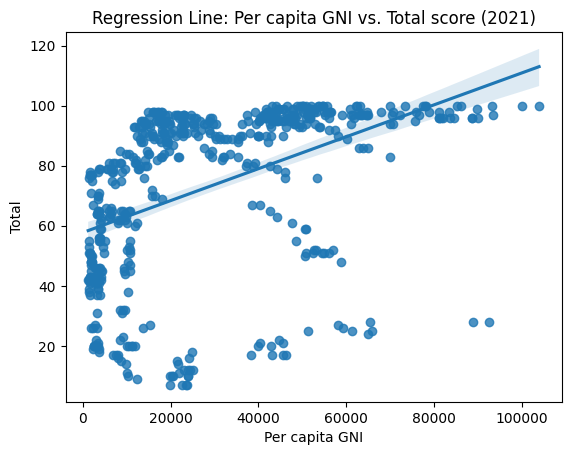

In [ ]:
# Visualising the data using seaborn and matplotlib.

sns.regplot(x='Per capita GNI', y='Total', data=final_df_filtered)
# Creating scater plot with regression line using the data from final_df_filtere.

plt.title('Regression Line: Per capita GNI vs. Total score (2021)')
# Setting the title of the plot.

plt.show()


As the linear regression line indicates an overall increase trajectory, several clusters are noticeable in different areas. One cluster appears in the mid-range of freedom with low GNI, while another is observed around high levels of freedom and higher GNI. This suggests that, for the most part, economically developed countries tend to score higher on the freedom level.

"What political regime is showing the most economic progress?" 

Let's take a look at the gained insights through the scope of political regime, and answers our next question by pivoting our per capita GNI based on political regime and organizing it by year. This approach allows us to easily visualize changes occurring within each regime over time.

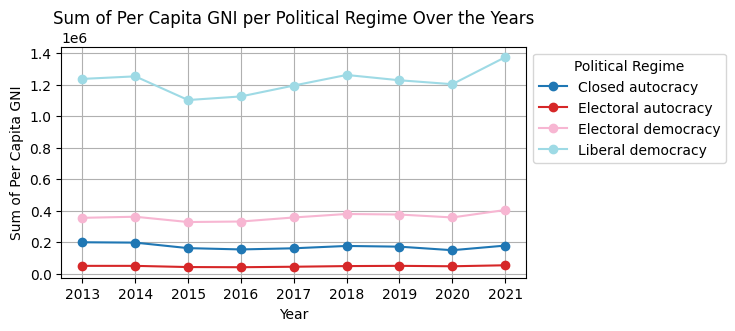

In [ ]:
# Using matplotlib for visualisation.

economic_progress_per_regime = final_df_filtered.groupby(['Year', 'Political regime'])['Per capita GNI'].sum().reset_index()
# Grouping by 'Year' and 'Political regime', then calculateing the sum of 'Per capita GNI' and reseting index.

economic_progress_pivot = economic_progress_per_regime.pivot(index='Year', columns='Political regime', values='Per capita GNI')
# Pivot the DataFrame to have 'Political regime' as columns.

economic_progress_pivot.plot.line(marker='o', figsize=(6, 3), colormap='tab20')
# Creating the line plot with markers for years, setting the size and the colors to be used.

plt.title('Sum of Per Capita GNI per Political Regime Over the Years')
plt.xlabel('Year')
plt.ylabel('Sum of Per Capita GNI')
plt.legend(title='Political Regime', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()
#Setting the the title, axes and legend with grid backround.


This visualization illustrates the most significant oscillations in per capita GNI within liberal democracies. Similar to freedom, it indicates the highest instability in the most developed countries.

We are filtering our dataset for the next analysis to eliminate any duplicates.

In [ ]:
final_df_2021 = final_df_filtered[final_df_filtered['Year'] == 2021]
# Filtering only data for 2021.

"Is there a correlation between per capita GNI and AI development?" 


Once again, employing linear regression and visualizing our data using clusters, we aim to answer our final question.

In [ ]:
correlation_value = final_df_2021['Per capita GNI'].dropna().corr(final_df_2021['Total score'].dropna())
print(f"Correlation between Per capita GNI and Total score for the year 2021: {correlation_value}")

Correlation between Per capita GNI and Total score for the year 2021: 0.5539012484598402


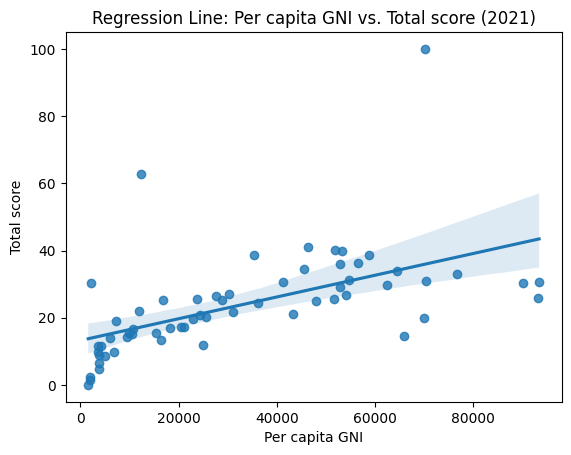

In [ ]:
sns.regplot(x='Per capita GNI', y='Total score', data=final_df_2021)
plt.title('Regression Line: Per capita GNI vs. Total score (2021)')
plt.show()

This final visualization reveals a strong correlation between the increase in the total score of AI development and GNI per capita. The linear regression line depicts an upward trajectory, with some clusters around it suggesting a stronger correlation in more tightly clustered areas. This, in turn, confirms that the strongest AI development is happening in countries with the highest economic and freedom instability.

If we acknowledge that our freedom is fragile, does that make AI developed in countries that enjoy higher levels of it less safe or equally unsafe? Throughout our extensive analysis, we reached several conclusions that confirmed a high indication of AI emerging around very vague freedom lines for humanity in all political regimes. However, liberal democracy exhibits the highest level of oscillations in all segments. This can be attributed, in part, to the concept of relatively less rigorous control over the population. The idea here is that less rigid control might suggest a more instable political and economical soceaty, potentially shaping a dynamic future for the free world.

Despite enjoying our freedom in western world and desiring more control over our lives, advancing rapidly in technologies without sufficient knowledge and readiness can pose dangers.

Throughout this analysis, it becomes apparent that our freedoms may not align with our expectations. To address this issue, education in emerging technologies is crucial. If people in countries with this is possible, take control of information, we can better safeguard our freedom.

While our analysis involves a relatively modest number of countries, limiting the importance of our conclusions, a more exhaustive examination of a larger sample would be imperative for more robust insights.

Exploring political regimes more comprehensively across historical contexts and diverse leadership would be highly advisable. This approach is essential for gaining a better understanding of how predictions regarding political regimes can be formulated, and whether this specific subject is relevant only when examined from an individual perspective.
